In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
print(cv2.__version__)

4.12.0


In [3]:
image = cv2.imread("../data/raw/Apple/Fresh/apple_fresh_001.jpg (1).jpg")

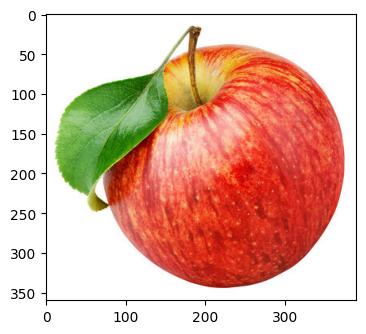

In [4]:
plt.figure(figsize=(4,4))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

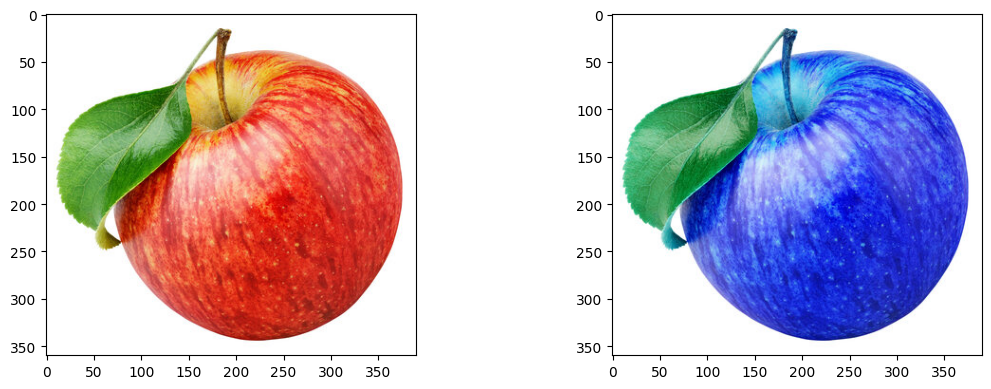

In [5]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 4))
axarr[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axarr[1].imshow(image)
fig.set_tight_layout(True)
plt.show()

In [6]:
image.shape

(360, 390, 3)

In [7]:
print("height:", image.shape[0])
print("width:", image.shape[1])
print("channels:", image.shape[2])
print(f"the image size is: {image.shape[0]}x{image.shape[1]} pixels")

height: 360
width: 390
channels: 3
the image size is: 360x390 pixels


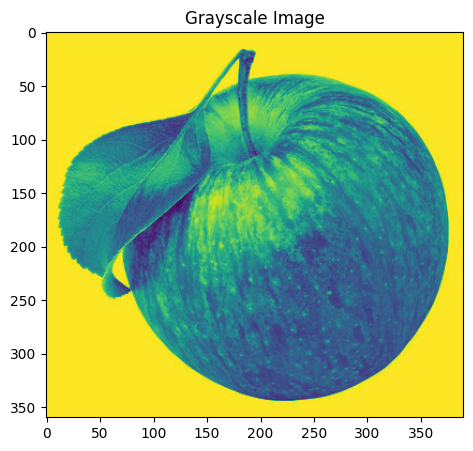

In [8]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
wight = image.shape[1]
height = image.shape[0]
aspect_ratio = wight / height
plt.figure(figsize=(5*aspect_ratio, 5))
plt.imshow(image_gray)
plt.title("Grayscale Image")
plt.show()

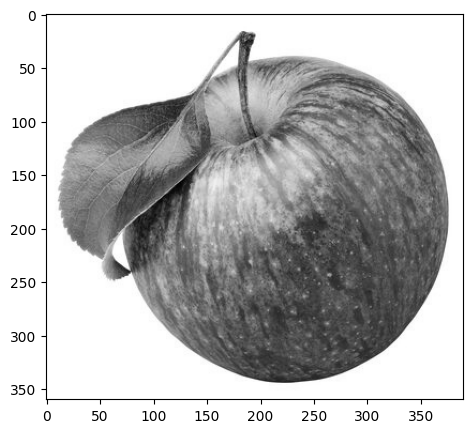

In [9]:
plt.figure(figsize=(5*aspect_ratio, 5))
plt.imshow(image_gray, cmap='gray')
plt.show()

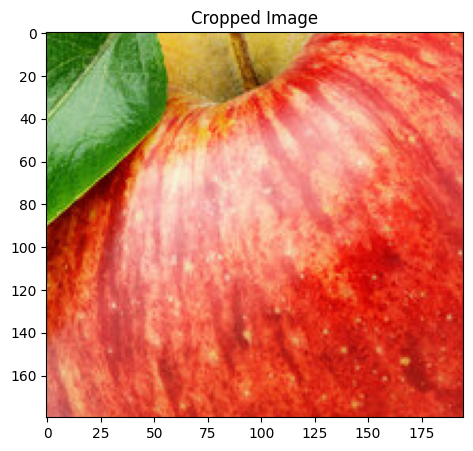

In [10]:
start_row = int(height * 0.25)
end_row = int(height * 0.75)
start_col = int(wight * 0.25)
end_col = int(wight * 0.75)

cropped_image = image[start_row:end_row, start_col:end_col]
plt.figure(figsize=(5*aspect_ratio, 5))
plt.title("Cropped Image")
plt.imshow(cropped_image)
plt.show()

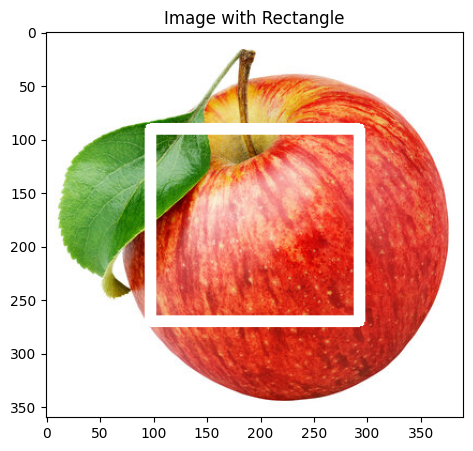

In [22]:
copy = image.copy()
cv2.rectangle(copy, (start_col, start_row), (end_col, end_row), (255, 255, 255), 10)
plt.figure(figsize=(5*aspect_ratio, 5))
plt.title("Image with Rectangle")
plt.imshow(copy)
plt.show()

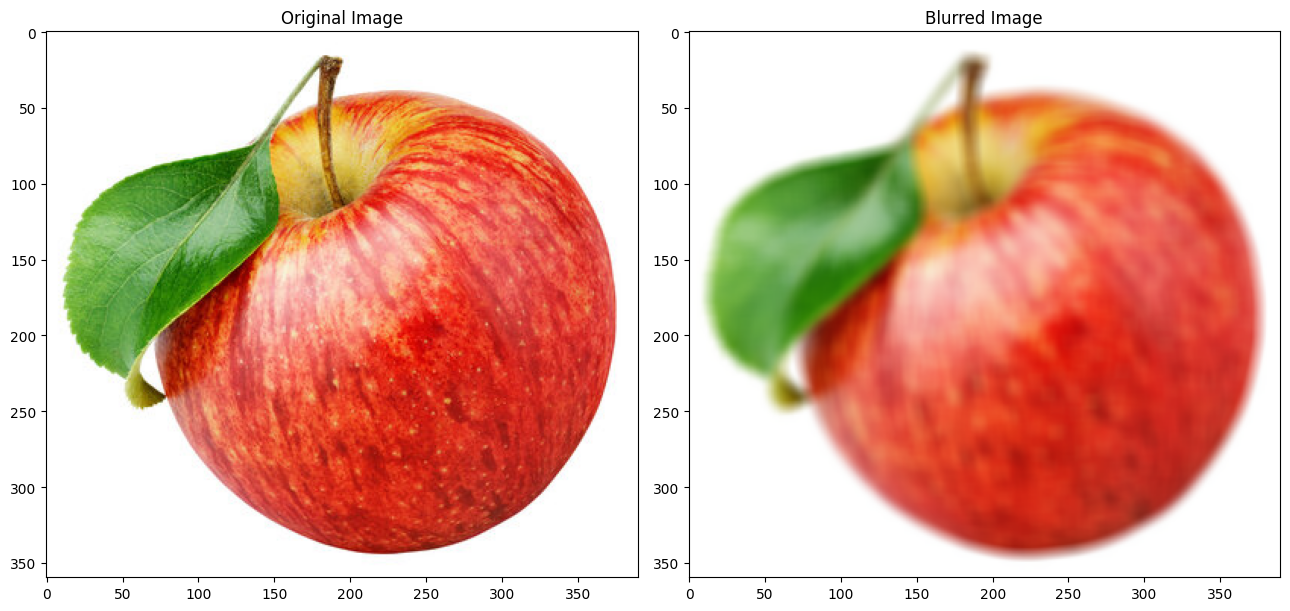

In [12]:
blurred_image = cv2.blur(image, ksize=(10,10))
fig, axarr = plt.subplots(1, 2, figsize=(12*aspect_ratio, 6))
axarr[0].imshow(image)
axarr[0].set_title("Original Image")
axarr[1].imshow(blurred_image)
axarr[1].set_title("Blurred Image")
fig.set_tight_layout(True)
plt.show()

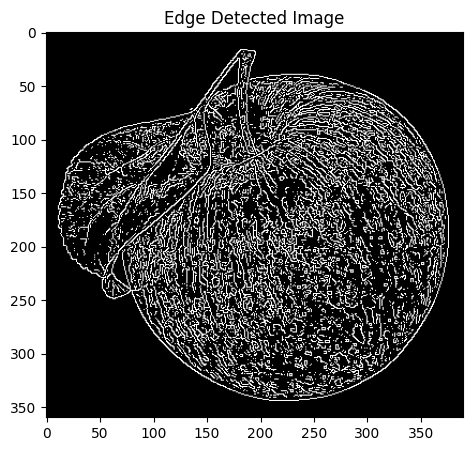

In [82]:
edge_image = cv2.Canny(image, threshold1=100, threshold2=100)
plt.figure(figsize=(5*aspect_ratio, 5))
plt.title("Edge Detected Image")
plt.imshow(edge_image, cmap='gray')
plt.show()

In [14]:
cv2.imwrite("../data/processed/image2.jpg", cv2.cvtColor(blurred_image, cv2.COLOR_RGB2BGR))

True

[217  15  11]
(360, 390)


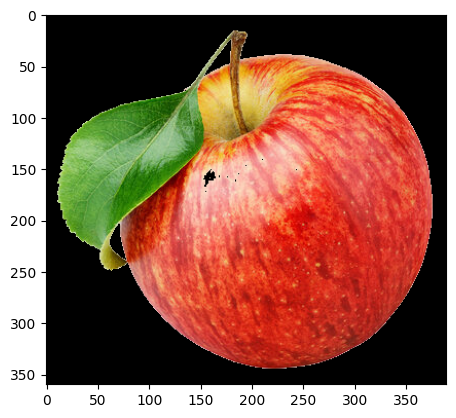

In [15]:
print(image[200,250])
image_1 = image.copy()
# image_1=image_1[:255,150:170]
# image_1[100:150] = [0,0,0]
mask = np.all(image_1 >= [200,200,200], axis=-1)
print(mask.shape)
image_1[mask] = [0,0,0]
plt.imshow(image_1)
plt.show()

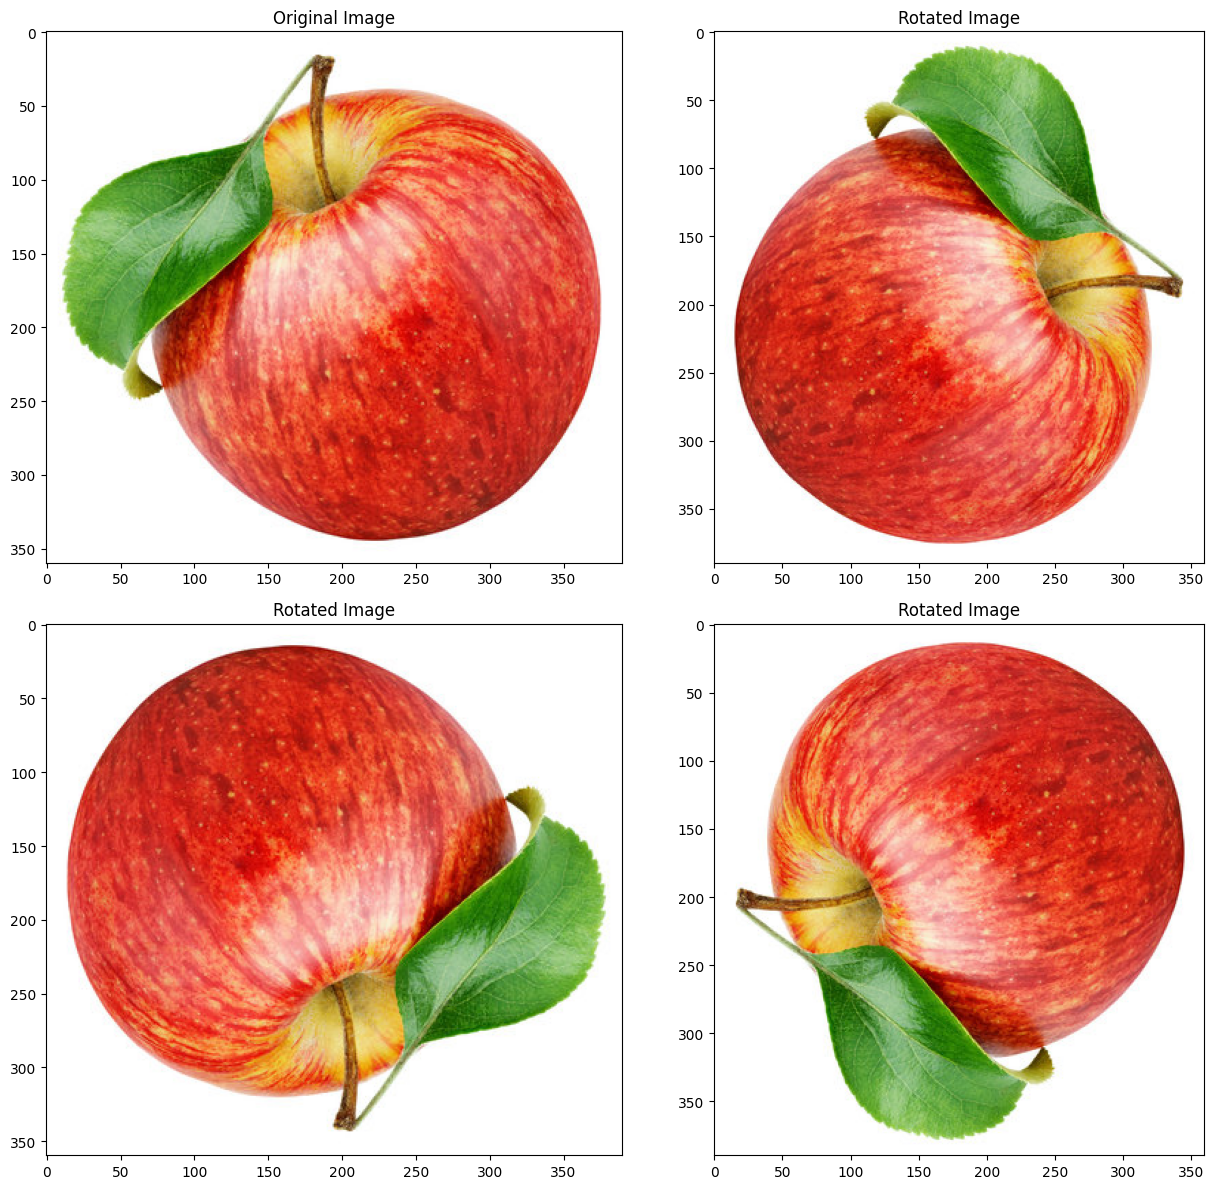

In [16]:
fig, axarr = plt.subplots(2, 2, figsize=(12*aspect_ratio, 12))
axarr[0][0].imshow(image)
axarr[0][0].set_title("Original Image")
image_rotated = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
axarr[0][1].imshow(image_rotated)
axarr[0][1].set_title("Rotated Image")
image_rotated = cv2.rotate(image, cv2.ROTATE_180)
axarr[1][0].imshow(image_rotated)
axarr[1][0].set_title("Rotated Image")
image_rotated = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
axarr[1][1].imshow(image_rotated)
axarr[1][1].set_title("Rotated Image")
fig.set_tight_layout(True)
plt.show()

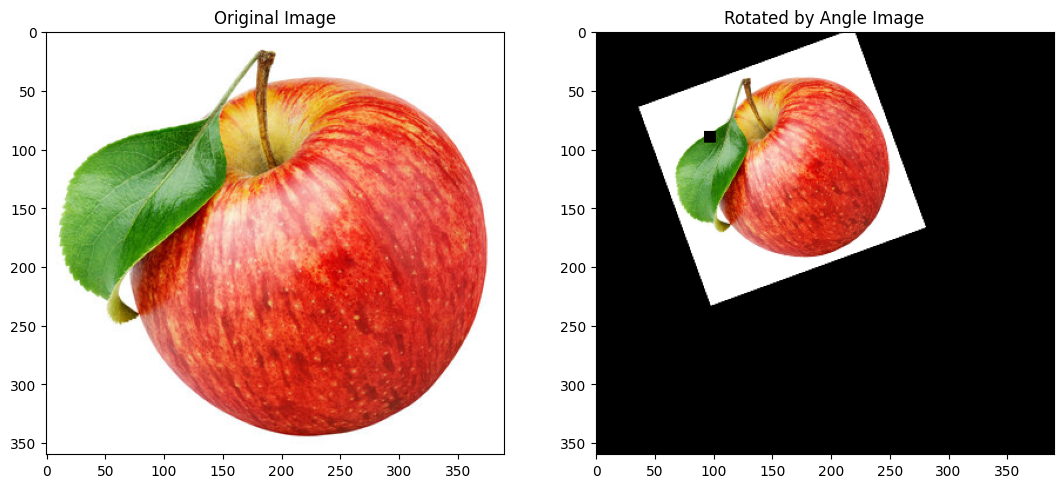

In [17]:
rotate_center = (wight//4, height//4)
image_rotated_angle = cv2.getRotationMatrix2D(rotate_center, 20, 0.5)
rotated_image = cv2.warpAffine(image, image_rotated_angle, (wight, height))
rotated_image[rotate_center[1]-5:rotate_center[1]+5, rotate_center[0]-5:rotate_center[0]+5] = [0,0,0]
fig, axarr = plt.subplots(1, 2, figsize=(12*aspect_ratio, 6))
axarr[0].imshow(image)
axarr[0].set_title("Original Image")
axarr[1].imshow(rotated_image)
axarr[1].set_title("Rotated by Angle Image")
plt.show()

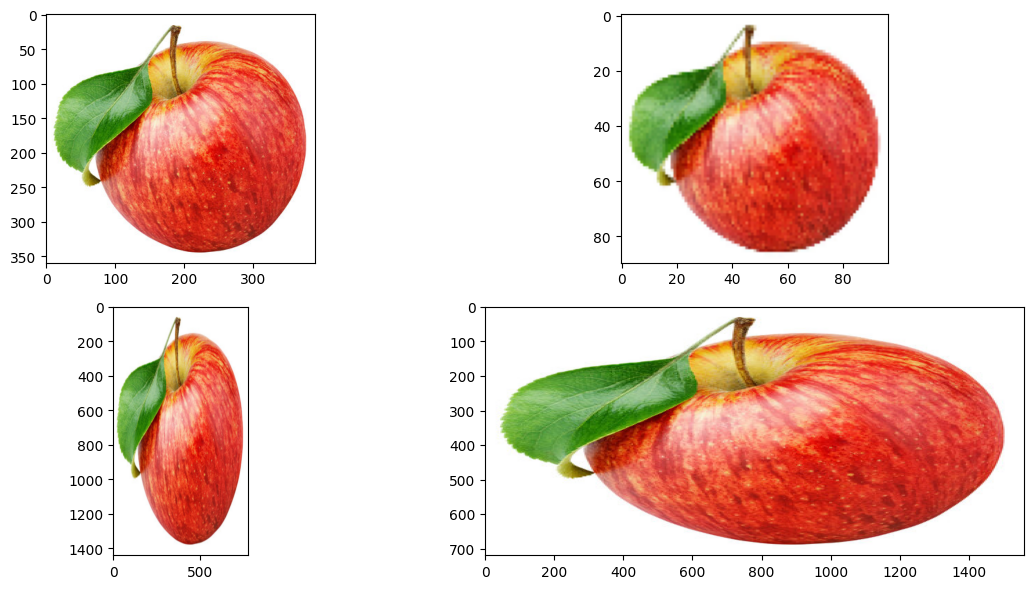

In [18]:
fig, axarr = plt.subplots(2, 2, figsize=(12*aspect_ratio, 6))
axarr[0][0].imshow(image)
image_resized = cv2.resize(image, (wight//4, height//4))
axarr[0][1].imshow(image_resized)
image_resized = cv2.resize(image, (wight*2, height*4))
axarr[1][0].imshow(image_resized)
image_resized = cv2.resize(image, (wight*4, height*2), interpolation=cv2.INTER_AREA)
axarr[1][1].imshow(image_resized)
fig.set_tight_layout(True)
plt.show()

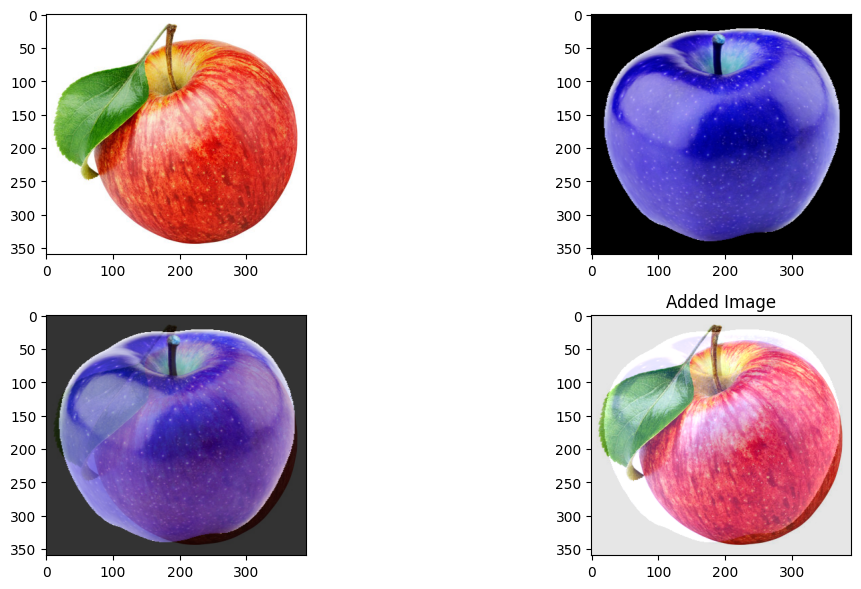

In [19]:
image2 = cv2.imread("../data/raw/Apple/Fresh/apple_fresh_001.jpg (1).png")
image2 = cv2.resize(image2, (wight, height))
fig, axarr = plt.subplots(2, 2, figsize=(12*aspect_ratio, 6))
image_added = cv2.addWeighted(image, 0.2, image2, 0.8, 0)
axarr[0][0].imshow(image)
axarr[0][1].imshow(image2)
axarr[1][0].imshow(image_added)
image_added = cv2.addWeighted(image, 0.9, image2, 0.4, 0)
axarr[1][1].imshow(image_added)
plt.title("Added Image")
plt.imshow(image_added)
fig.set_tight_layout(True)
plt.show()

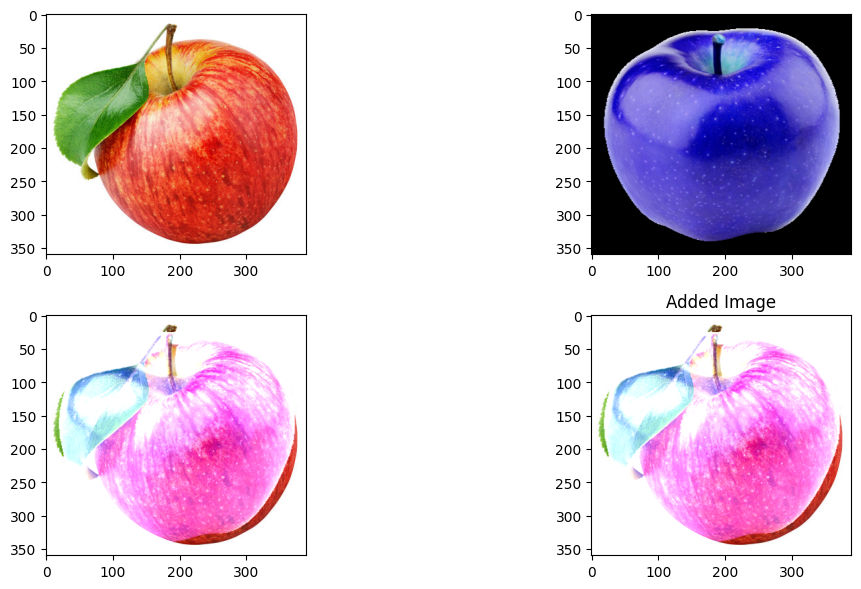

In [21]:
image2 = cv2.imread("../data/raw/Apple/Fresh/apple_fresh_001.jpg (1).png")
image2 = cv2.resize(image2, (wight, height))
fig, axarr = plt.subplots(2, 2, figsize=(12*aspect_ratio, 6))
image_added = cv2.add(image, image2)
axarr[0][0].imshow(image)
axarr[0][1].imshow(image2)
axarr[1][0].imshow(image_added)
image_added = cv2.add(image, image2)
axarr[1][1].imshow(image_added)
plt.title("Added Image")
plt.imshow(image_added)
fig.set_tight_layout(True)
plt.show()

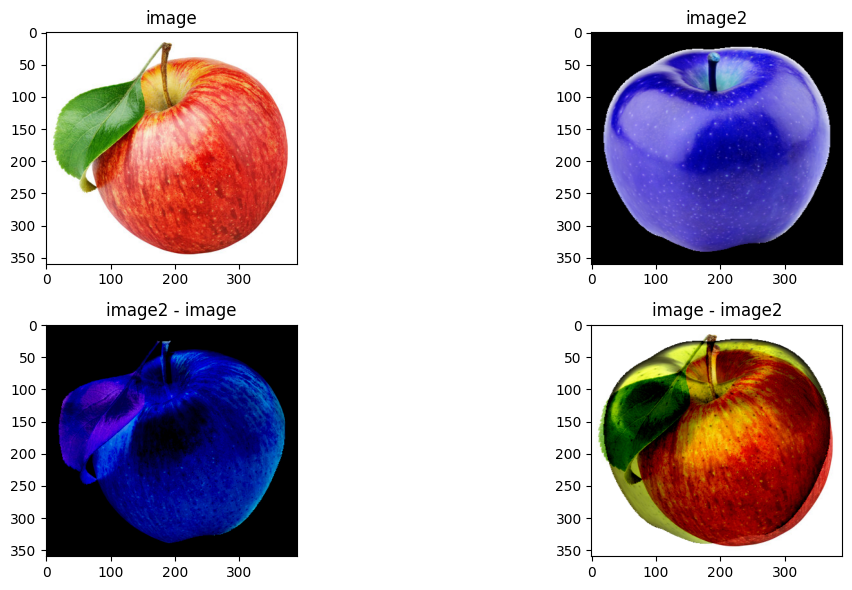

In [31]:
image2 = cv2.imread("../data/raw/Apple/Fresh/apple_fresh_001.jpg (1).png")
image2 = cv2.resize(image2, (wight, height))
fig, axarr = plt.subplots(2, 2, figsize=(12*aspect_ratio, 6))
image_added = cv2.subtract(image2, image)
axarr[0][0].set_title("image")
axarr[0][0].imshow(image)
axarr[0][1].set_title("image2")
axarr[0][1].imshow(image2)
axarr[1][0].set_title("image2 - image")
axarr[1][0].imshow(image_added)
image_added = cv2.subtract(image, image2)
axarr[1][1].set_title("image - image2")
axarr[1][1].imshow(image_added)
plt.imshow(image_added)
fig.set_tight_layout(True)
plt.show()

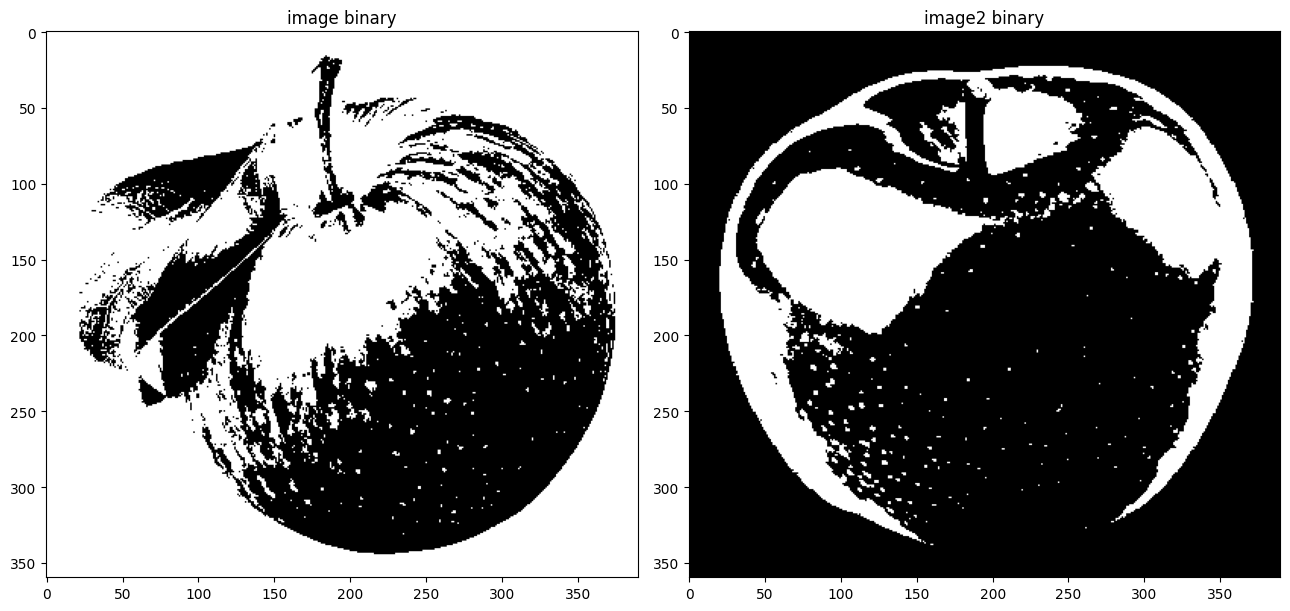

In [41]:
image_binary = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)[1]
image_binary2 = cv2.threshold(cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)[1]
fig, axarr = plt.subplots(1, 2, figsize=(12*aspect_ratio, 6))
axarr[0].set_title("image binary")
axarr[0].imshow(image_binary, cmap='gray')
axarr[1].set_title("image2 binary")
axarr[1].imshow(image_binary2, cmap='gray')
fig.set_tight_layout(True)
plt.show()

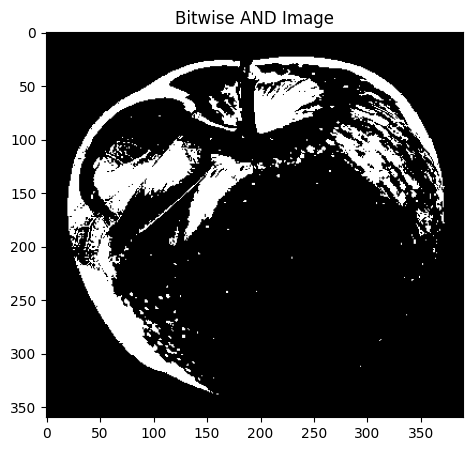

In [45]:
image_and = cv2.bitwise_and(image_binary, image_binary2, mask=None)
plt.figure(figsize=(5*aspect_ratio, 5))
plt.title("Bitwise AND Image")
plt.imshow(image_and, cmap='gray')
plt.show()

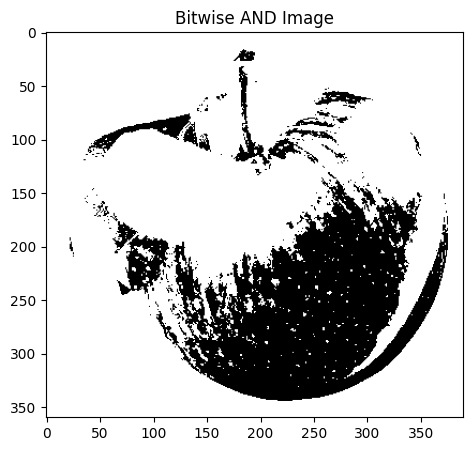

In [46]:
image_or = cv2.bitwise_or(image_binary, image_binary2, mask=None)
plt.figure(figsize=(5*aspect_ratio, 5))
plt.title("Bitwise AND Image")
plt.imshow(image_or, cmap='gray')
plt.show()

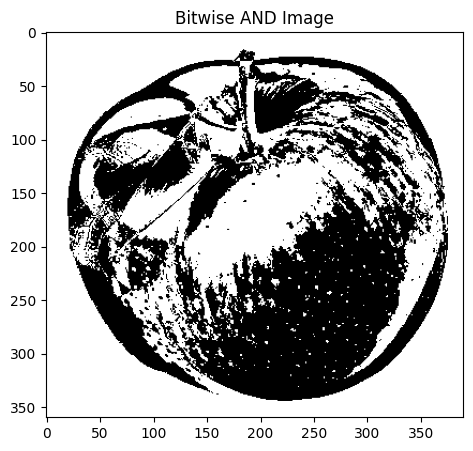

In [47]:
image_xor = cv2.bitwise_xor(image_binary, image_binary2, mask=None)
plt.figure(figsize=(5*aspect_ratio, 5))
plt.title("Bitwise AND Image")
plt.imshow(image_xor, cmap='gray')
plt.show()

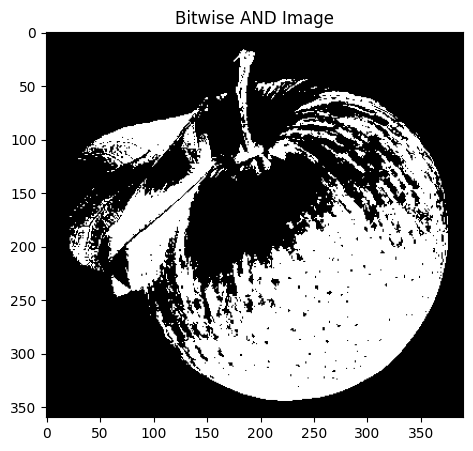

In [48]:
image_not = cv2.bitwise_not(image_binary, mask=None)
plt.figure(figsize=(5*aspect_ratio, 5))
plt.title("Bitwise AND Image")
plt.imshow(image_not, cmap='gray')
plt.show()

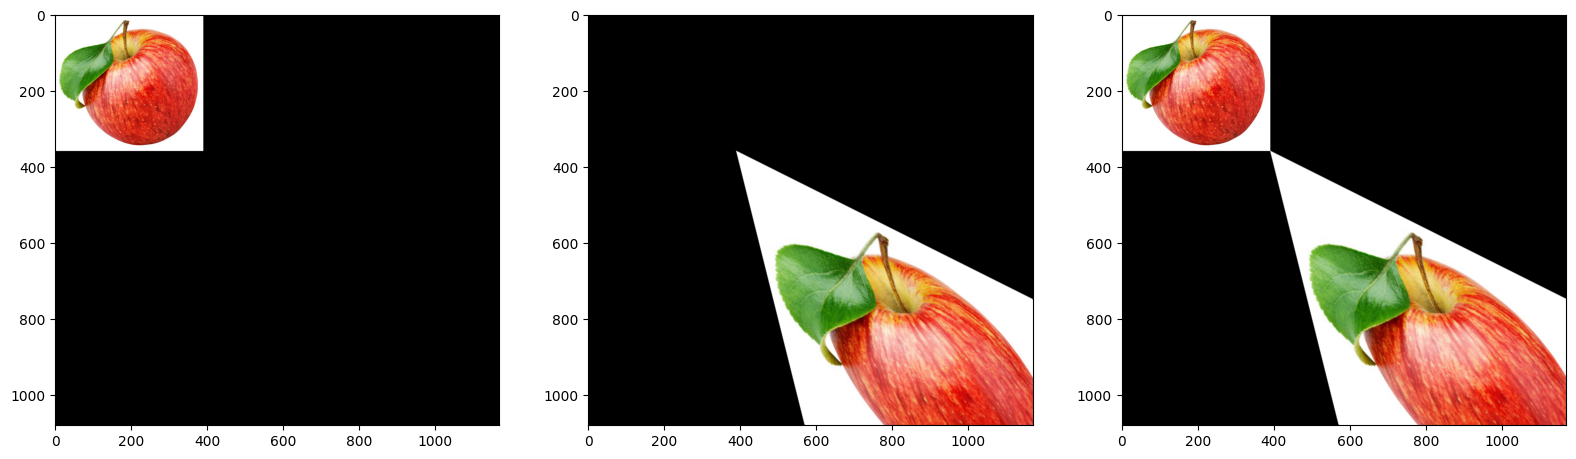

In [81]:
translation_matrix = np.float32([[1, 0, 0], [0, 1, 0]])
image_translated = cv2.warpAffine(image, translation_matrix, (wight*3, height*3))
fig, axarr = plt.subplots(1, 3, figsize=(18*aspect_ratio, 6))
axarr[0].imshow(image_translated)

translation_matrix = np.float32([[2, 0.5, wight], [1, 2, height]])
image_translated1 = cv2.warpAffine(image, translation_matrix, (wight*3, height*3))
axarr[1].imshow(image_translated1)

axarr[2].imshow(cv2.add(image_translated, image_translated1))
plt.show()

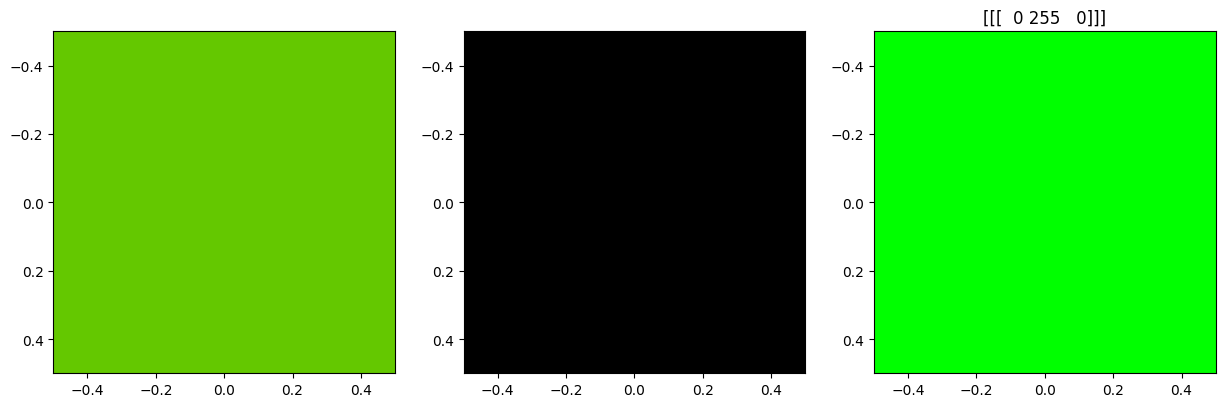

In [103]:
image_1px = np.array([[[100, 200, 0]]], dtype=np.uint8)
image_1px_1 = cv2.threshold(cv2.cvtColor(image_1px, cv2.COLOR_RGB2GRAY), 127, 255, cv2.THRESH_BINARY)[1]
image_1px_2 = cv2.threshold(image_1px, 127, 255, cv2.THRESH_BINARY)[1]
fig, axarr = plt.subplots(1, 3, figsize=(15, 5))
axarr[0].imshow(image_1px)
axarr[1].imshow(image_1px_1, cmap='gray')
axarr[2].imshow(image_1px_2)
axarr[2].set_title(image_1px_2)
plt.show()